## Visualizing Learning
Now that we know how to load models from checkpoints, we can sample synthetic data from the loaded model as well as visualize the saved statistics. 

In [1]:
#Matplotlib imports
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

In [2]:
import glob, os, sys, time
import numpy as np
sys.path.append('../')
from utils.misc import getConfigFile, readPickle, displayTime, loadHDF5
start_time = time.time()
from   model_th.dmm import DMM
import model_th.learning as DMM_learn
import model_th.evaluate as DMM_evaluate
displayTime('importing DMM',start_time, time.time())

/Users/shiyunqiu/miniconda3/envs/myenv/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


		< importing DMM > took  2.31661891937   seconds


### Training and Validation Bounds
Note that you can change what is saved at intervals during training in `prefix-EP<#>-stats.h5` in `model_th/learning.py`. For now, we have just saved the validation and training bound. 

In [3]:
#Lets look at the statistics saved at epoch 30
stats = loadHDF5('./chkpt-ipython/DMM_lr-0_0008-dh-20-ds-2-nl-relu-bs-200-ep-40-rs-40-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP30-stats.h5')
print [(k,stats[k].shape) for k in stats.keys()]

[(u'valid_bound', (4, 2)), (u'train_bound', (31, 2))]


Text(0,0.5,'Upper Bound on $-\\log p(x)$')

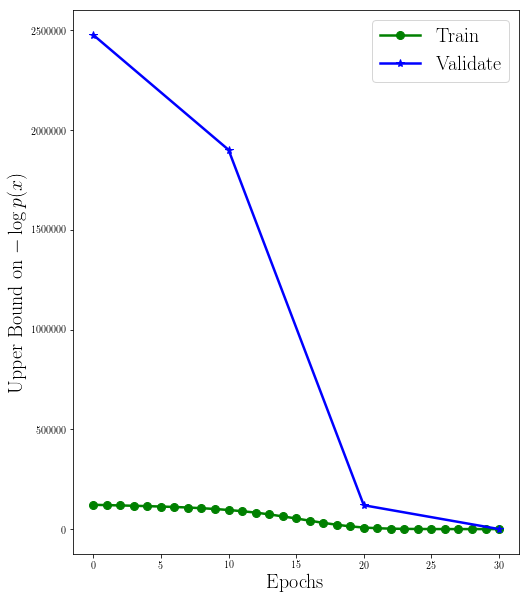

In [4]:
plt.figure(figsize=(8,10))
plt.plot(stats['train_bound'][:,0],stats['train_bound'][:,1],'-o',color='g',label='Train')
plt.plot(stats['valid_bound'][:,0],stats['valid_bound'][:,1],'-*',color='b',label='Validate')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Upper Bound on $-\log p(x)$')

### Sampling from the Model
Lets load a model now and use the helper functions defined in `model_th/evaluate.py` to evaluate the learned model.

In [5]:
DIR    = './chkpt-ipython/'
prefix = 'DMM_lr-0_0008-dh-20-ds-2-nl-relu-bs-200-ep-40-rs-40-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid'
pfile  =  os.path.join(DIR,prefix+'-config.pkl')
params = readPickle(pfile, quiet=True)[0]
EP     = '-EP30'
reloadFile  =  os.path.join(DIR,prefix+EP+'-params.npz')
print 'Model parameters in: ',reloadFile
params['validate_only'] = True
dmm_reloaded  = DMM(params, paramFile = pfile, reloadFile = reloadFile)

Model parameters in:  ./chkpt-ipython/DMM_lr-0_0008-dh-20-ds-2-nl-relu-bs-200-ep-40-rs-40-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP30-params.npz
	<<Reloading Model>>
	<<Loading structure (./chkpt-ipython/DMM_lr-0_0008-dh-20-ds-2-nl-relu-bs-200-ep-40-rs-40-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-config.pkl) and model (./chkpt-ipython/DMM_lr-0_0008-dh-20-ds-2-nl-relu-bs-200-ep-40-rs-40-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP30-params.npz) / opt (./chkpt-ipython/DMM_lr-0_0008-dh-20-ds-2-nl-relu-bs-200-ep-40-rs-40-rd-0_1-infm-R-tl-2-el-2-ar-2_0-use_p-approx-rc-lstm-uid-EP30-optParams.npz) weights>>
Adding/Modifying loaded parameters:  validate_only  to  True
	<<Nparameters: 14413>>


../models/__init__.py:201: UserWarning: lr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
../models/__init__.py:201: UserWarning: anneal found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
../models/__init__.py:201: UserWarning: update_ctr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")


	<<Anneal = 1 in 2.0 param. updates>>
	<<Building with RNN dropout:0.0>>
	<<In _LSTM_RNN_layer with dropout 0.0000>>
	<<Completed DMM setup>>
	<<_buildModel took : 70.6691 seconds>>


In [6]:
(mu, logcov), zvec = DMM_evaluate.sample(dmm_reloaded, T= 10)

In [9]:
mu.shape

(100, 10, 1)

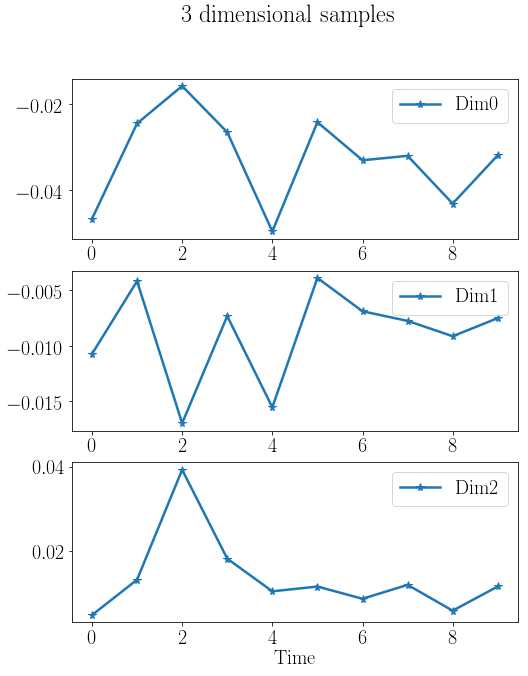

In [36]:
# fig,axlist_x = plt.subplots(3,1,figsize=(8,10))
# SNUM         = 0
# for idx, ax in enumerate(axlist_x.ravel()):
#     mu_x = mu[SNUM,:,idx]
#     ax.plot(np.arange(mu_x.shape[0]), mu_x, '-*', label = 'Dim'+str(idx))
#     ax.legend()
# ax.set_xlabel('Time')
# plt.suptitle('3 dimensional samples')

* While the above is a nonsensical toy dataset (the samples don't mean anything), it can form a starting point for analysis with the model